# <span style='font-family:Futura;font-weight:bold'>NOTEBOOK 7</span>

---

This notebook contains the codes used during the seventh lecture of the course <span style='color:SlateBlue;font-style:italic'>"Modelling from Measurements"</span>.

## <span style='font-family:Futura;font-weight:bold'>Exercise 5.1</span>

Let's consider again the Lorenz equations:

\begin{align}
x' &= \sigma (y - x) \\
y' &= rx -y - xz \\
z' &= xy -bz
\end{align}

The goal of this notebook is to demonstrate that we can use a Neural Network to learn an update rule which advances the state space from $\textbf x_k$ to $\textbf x_{k+1}$.

In [58]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Palatino"

<IPython.core.display.Javascript object>


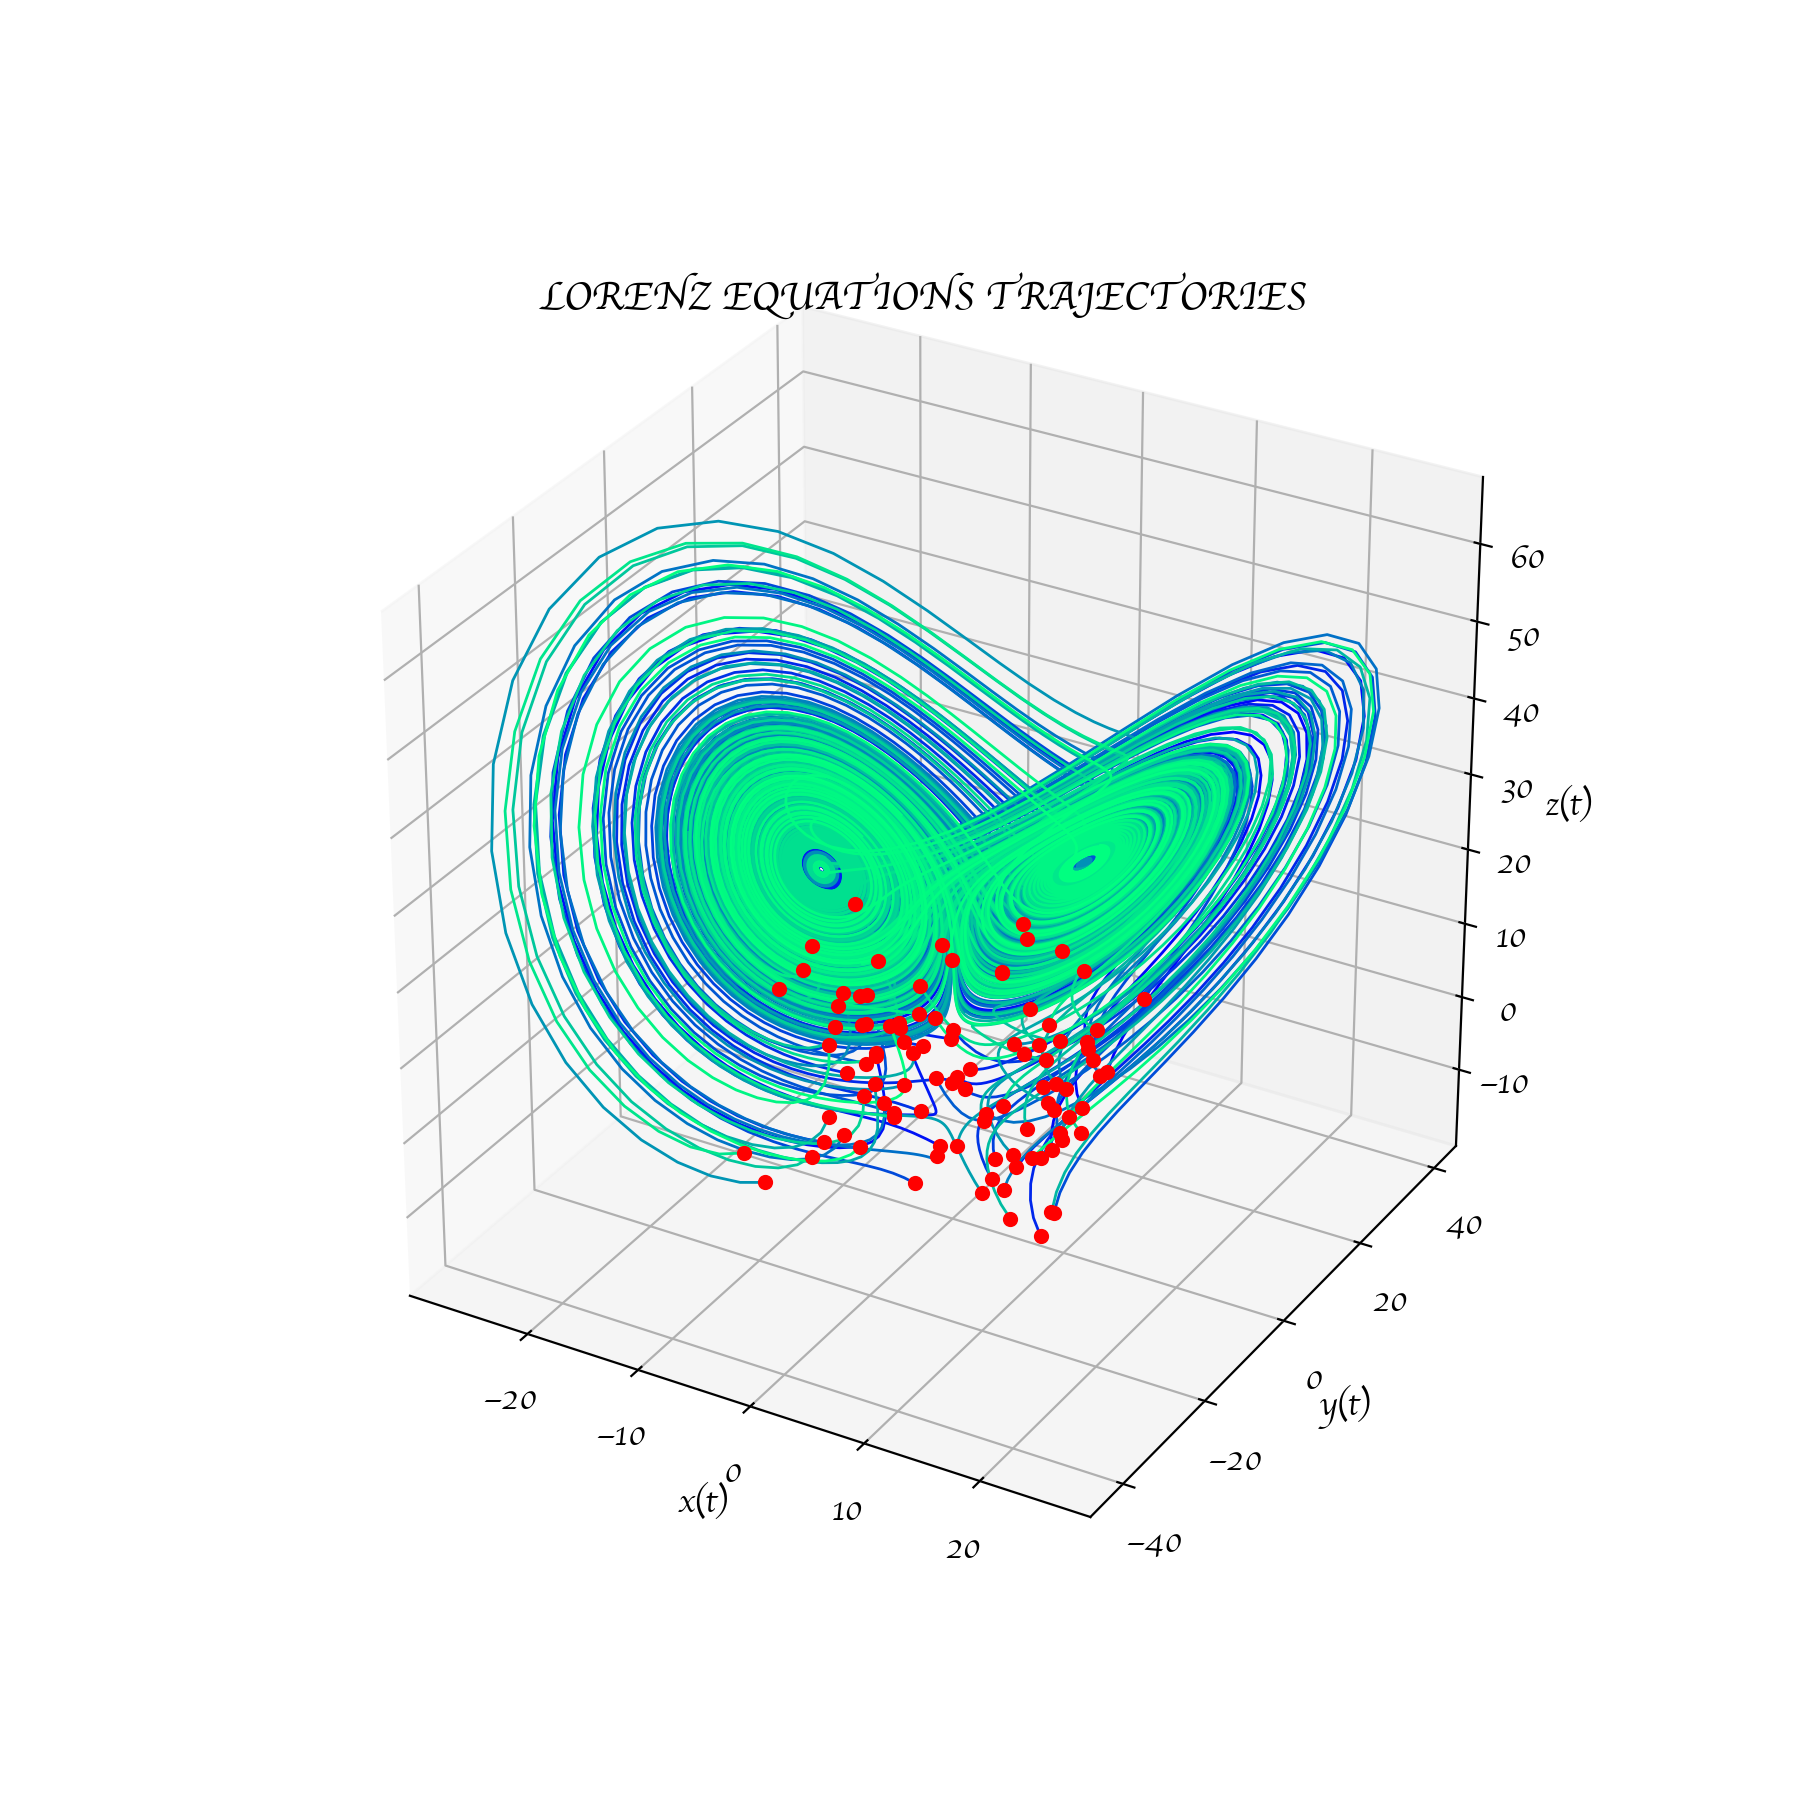

In [59]:
dt = 0.01
t = np.linspace(0, 8, int(8 / dt) + 1)

beta = 8/3
sigma = 10
rho = 28

def Lorenz(x, t, dummy, sigma, b, r):
    x1, x2, x3 = x
    rhs = [sigma * (x2 - x1),
           r * x1 - x2 - x1 * x3,
           x1 * x2 - b * x3]
    return rhs

ann_input = np.empty((0,3), int)
ann_output = np.empty((0,3), int)

fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
plt.title('LORENZ EQUATIONS TRAJECTORIES')

color = iter(cm.winter(np.linspace(0, 1, 100)))
    
for j in range(100):
    x0 = 30 * (np.random.random(3) - 0.5)
    x_sol = integrate.odeint(Lorenz, x0, t, args=([], sigma, beta, rho), mxstep=10**8) # integrate PDE
    ann_input = np.append(ann_input, x_sol[:-1, :], axis=0)
    ann_output = np.append(ann_output, x_sol[1:, :], axis=0)
    c=next(color)
    ax.scatter(x_sol[0, 0], x_sol[0, 1], x_sol[0, 2], color='r')
    ax.plot(x_sol[:, 0], x_sol[:, 1], x_sol[:, 2], linewidth='1', color=c)
    
